In [13]:
import sys

import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from IPython.display import HTML

import thicket as th
from thicket.model_extrap import Modeling

display(HTML("<style>.container { width:80% !important; }</style>"))

data = "../../data/LULESH/strong"
t_ens = th.Thicket.from_caliperreader(data)

t_ens.metadata["jobsize"]


profile
18651541        8
370228129     125
434091669     343
471908645     125
698951921     216
828840294      27
853273940       8
1006865177    343
1008523997    343
1089105918     27
1165329341    125
1368934926     64
1522911657     64
1563663154    216
1598455902    343
1819158627    216
1924195849     64
1953700611    216
2353569725      8
2474813063     64
2599942704      8
2634267720    125
2726304753     27
3184297958      8
3659442660     27
3741356656     27
3748411113     64
3827810182    343
4096232950    216
4119957150    125
Name: jobsize, dtype: int64

In [14]:
mdl = Modeling(
    t_ens,
    "jobsize",
    chosen_metrics=[
        "Avg time/rank",
        "Total time",
    ],
)

# use the median values for modeling
#mdl.produce_models(use_median=True, scaling="strong", scaling_parameter="jobsize")

# use weak scaling instead
mdl.produce_models(use_median=True, scaling="weak", scaling_parameter="jobsize")

self.param_name: jobsize
coordinates: [Coordinate(8.0,), Coordinate(125.0,), Coordinate(343.0,), Coordinate(216.0,), Coordinate(27.0,), Coordinate(64.0,)]
len coordinates: 6
Callpaths: [Callpath(main), Callpath(CommRecv), Callpath(CommSBN), Callpath(CommSend), Callpath(lulesh.cycle), Callpath(LagrangeLeapFrog), Callpath(CalcTimeConstraintsForElems), Callpath(LagrangeElements), Callpath(ApplyMaterialPropertiesForElems), Callpath(EvalEOSForElems), Callpath(CalcEnergyForElems), Callpath(CalcLagrangeElements), Callpath(CalcKinematicsForElems), Callpath(CalcQForElems), Callpath(CalcMonotonicQForElems), Callpath(CommMonoQ), Callpath(LagrangeNodal), Callpath(CalcForceForNodes), Callpath(CalcVolumeForceForElems), Callpath(CalcHourglassControlForElems), Callpath(CalcFBHourglassForceForElems), Callpath(IntegrateStressForElems), Callpath(CommSyncPosVel), Callpath(TimeIncrement)]
Metrics: [Metric(Avg time/rank), Metric(Total time)]
DEBUG: (8.0,) main Avg time/rank [28.159246, 28.037109, 28.134986,

In [15]:
t_ens.statsframe.dataframe

,name,Avg time/rank_extrap-model,Avg time/rank_RSS_extrap-model,Avg time/rank_rRSS_extrap-model,Avg time/rank_SMAPE_extrap-model,Avg time/rank_AR2_extrap-model,Avg time/rank_RE_extrap-model,Total time_extrap-model,Total time_RSS_extrap-model,Total time_rRSS_extrap-model,Total time_SMAPE_extrap-model,Total time_AR2_extrap-model,Total time_RE_extrap-model
node,,,,,,,,,,,,,
"{'name': 'main', 'type': 'function'}",main,43.506059233483626 + -4.820403181923026 * log2...,5.638988e+01,0.665410,38.762707,0.858499,0.272870,-561.8317119517446 + 486.64097592026275 * p^(1/4),108127.505764,0.197867,18.063055,0.884946,0.153026
"{'name': 'CommRecv', 'type': 'function'}",CommRecv,0.004190833333333333,5.264583e-07,0.027242,5.722593,1.000000,0.031463,0.024262697051797587 + 0.0003959801632508972 *...,0.012974,0.105542,13.101269,0.988287,0.104551
"{'name': 'CommSBN', 'type': 'function'}",CommSBN,0.7131191488289436 + -0.011642550008176546 * l...,2.872943e-01,614.171586,118.229882,0.296895,6.114476,6.145628833333332,205.586658,7.804934,64.502937,1.000000,0.206778
"{'name': 'CommSend', 'type': 'function'}",CommSend,0.09049883333333333,6.342998e-03,0.567383,25.134410,1.000000,0.203474,0.7370230057518447 + 0.01639643583450623 * p^(...,15.172917,0.182109,19.693681,0.943755,0.165484
"{'name': 'lulesh.cycle', 'type': 'function'}",lulesh.cycle,43.49831920928261 + -4.820398760359029 * log2(...,5.645209e+01,0.667147,38.830180,0.858346,0.273258,-559.5021893221226 + 485.5185467703588 * p^(1/4),107917.130062,0.201398,18.124851,0.884649,0.153769
"{'name': 'LagrangeLeapFrog', 'type': 'function'}",LagrangeLeapFrog,40.3291813868961 + -4.643024143377328 * log2(p...,5.435500e+01,1.642327,60.652292,0.854074,0.379010,-258.3009986457774 + 156.301589155247 * log2(p...,118424.336814,0.156942,18.291172,0.729735,0.148258
"{'name': 'CalcTimeConstraintsForElems', 'type': 'function'}",CalcTimeConstraintsForElems,0.2872361354886162 + -0.02400446737729145 * lo...,2.321376e-03,0.125908,14.582896,0.766046,0.114822,1.3822118938445402 + 0.04863671989842907 * p^(...,7.413584,0.082882,10.667008,0.987705,0.090966
"{'name': 'LagrangeElements', 'type': 'function'}",LagrangeElements,14.47383327450517 + -1.5584546463225868 * log2...,8.158291e+00,0.556204,35.536645,0.808016,0.264392,-12.307556039178044 + 17.899275922050045 * p^(...,28904.303367,0.171095,18.997782,0.842693,0.150553
"{'name': 'ApplyMaterialPropertiesForElems', 'type': 'function'}",ApplyMaterialPropertiesForElems,7.131322678243656 + -0.7223920442577403 * log2...,1.518325e+00,0.379441,25.351658,0.830199,0.187757,14.970269289498 + 5.96982959968827 * p^(3/4),5322.410114,0.090452,12.408118,0.954521,0.098806


,Avg time/rank_extrap-model,Total time_extrap-model
node,,
"{'name': 'main', 'type': 'function'}",,
"{'name': 'CommRecv', 'type': 'function'}",,
"{'name': 'CommSBN', 'type': 'function'}",,
"{'name': 'CommSend', 'type': 'function'}",,
"{'name': 'lulesh.cycle', 'type': 'function'}",,
"{'name': 'LagrangeLeapFrog', 'type': 'function'}",,
"{'name': 'CalcTimeConstraintsForElems', 'type': 'function'}",,
"{'name': 'LagrangeElements', 'type': 'function'}",,
"{'name': 'ApplyMaterialPropertiesForElems', 'type': 'function'}",,

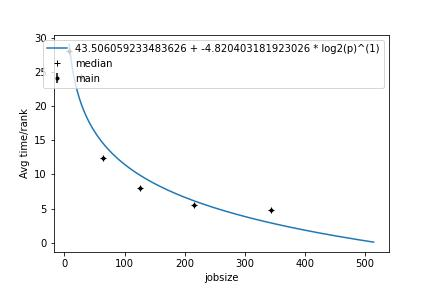
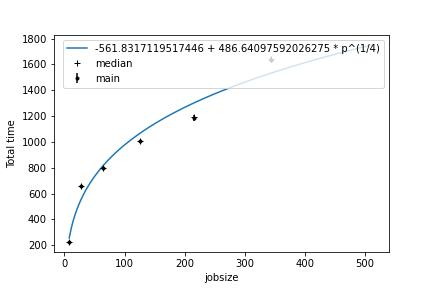
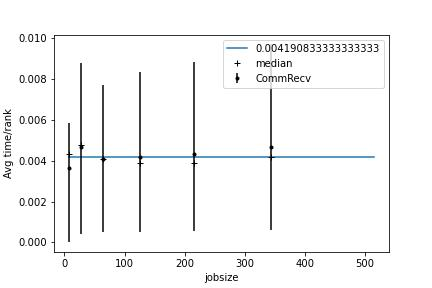
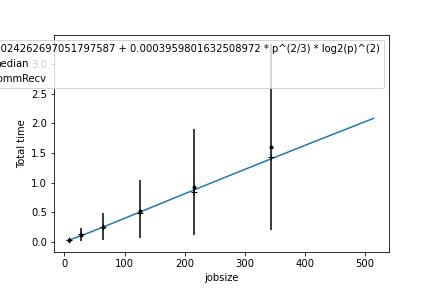
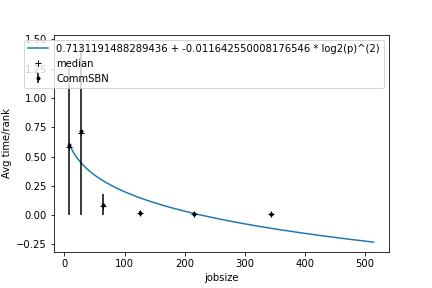
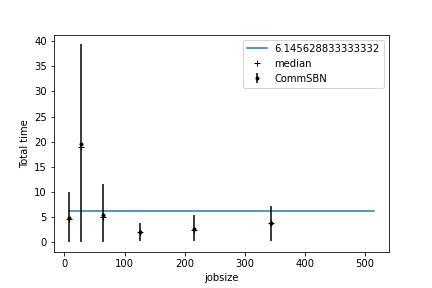
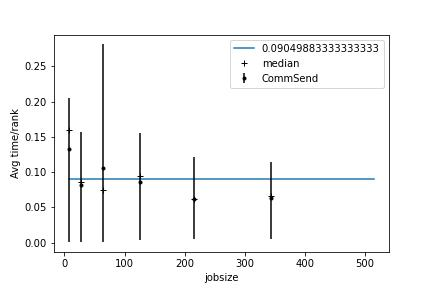
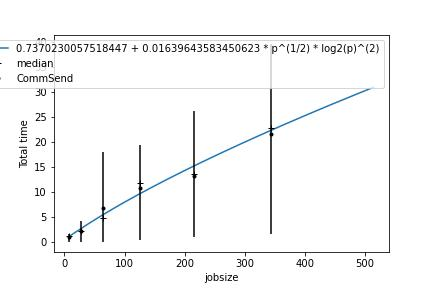
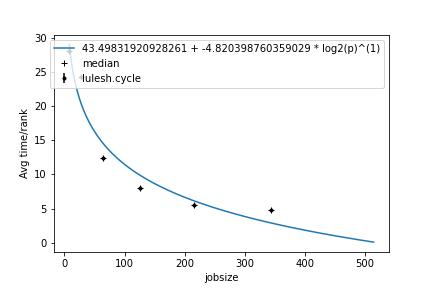
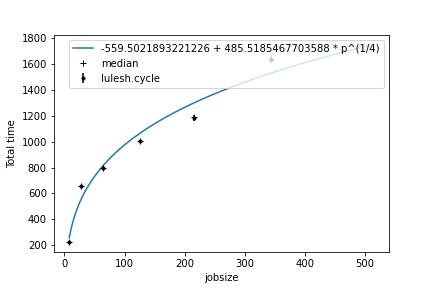
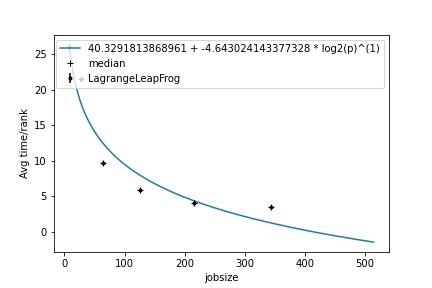
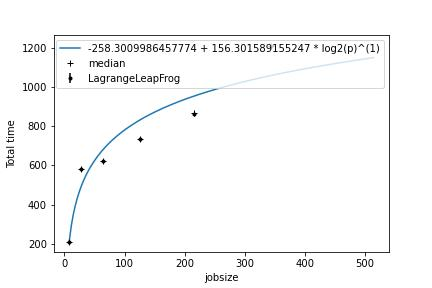
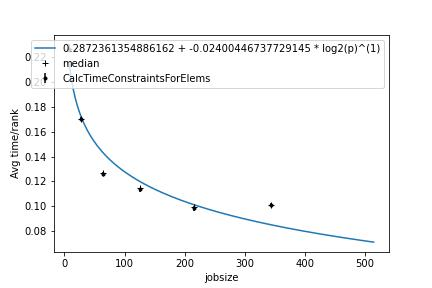
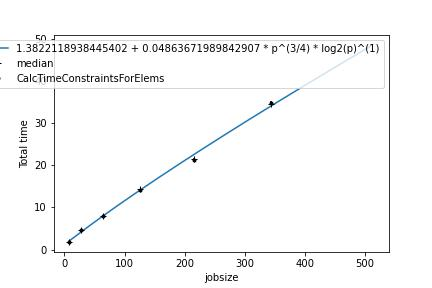
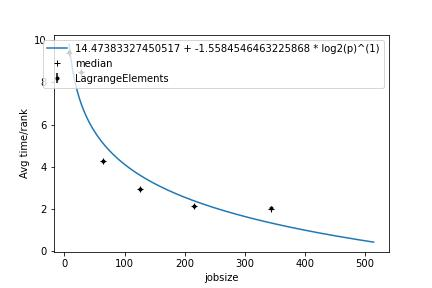
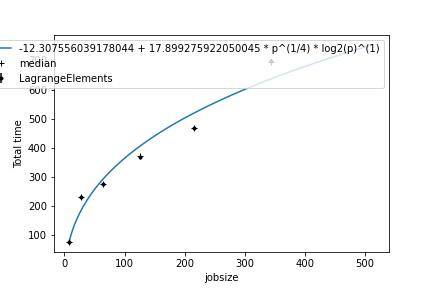
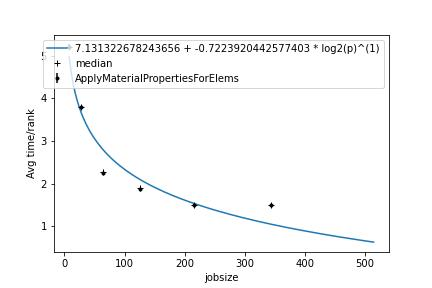
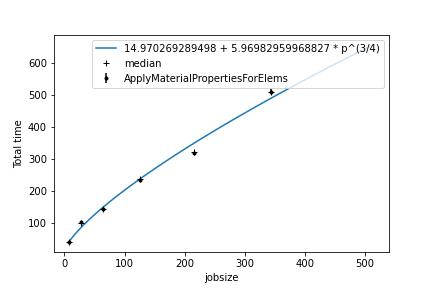
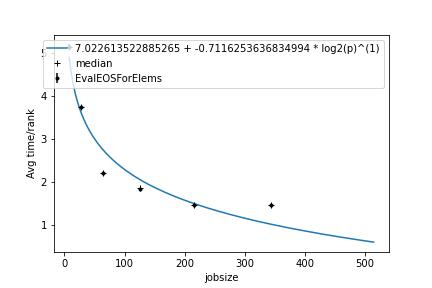
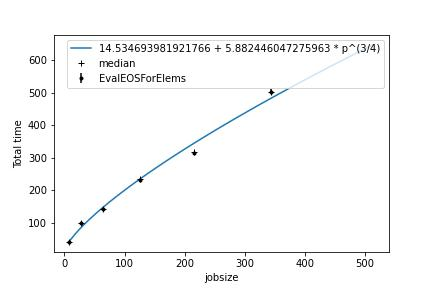
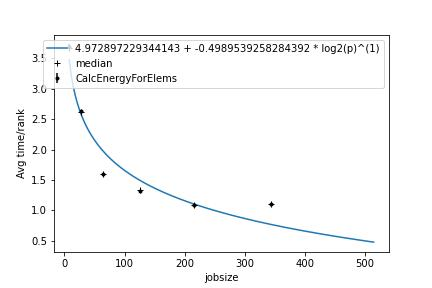
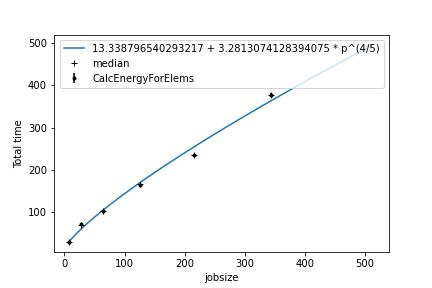
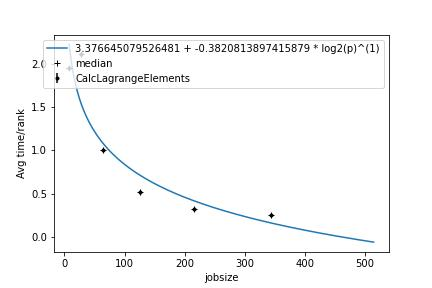
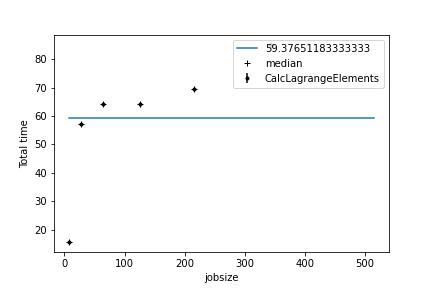
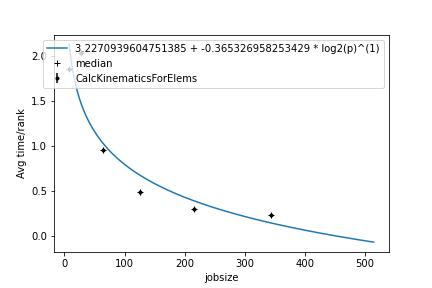
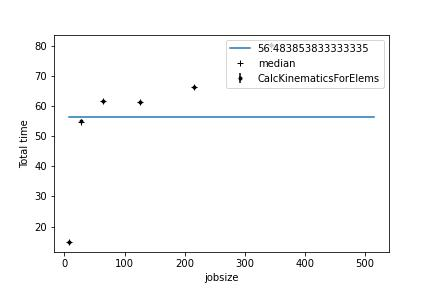
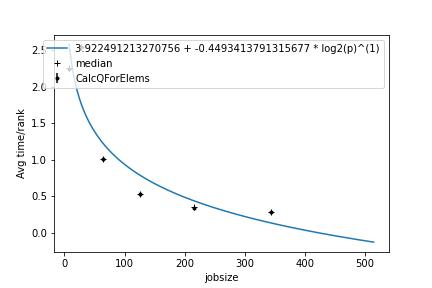
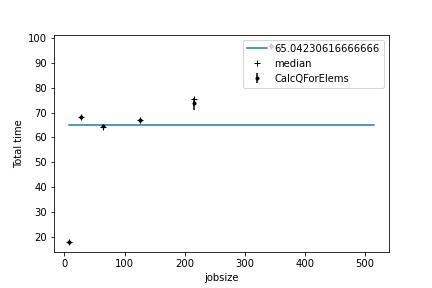
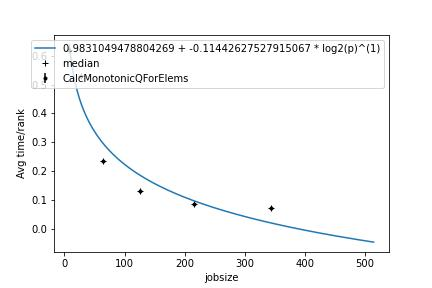
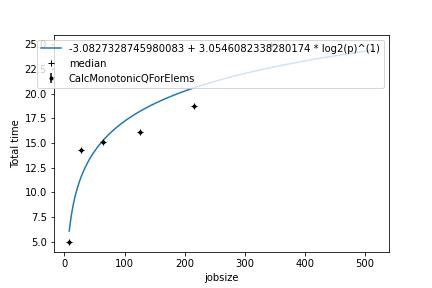
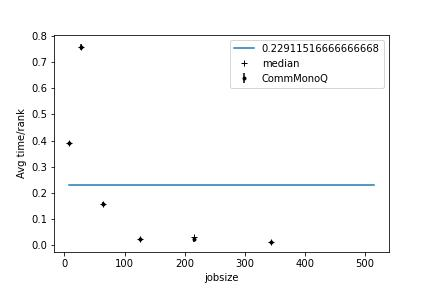
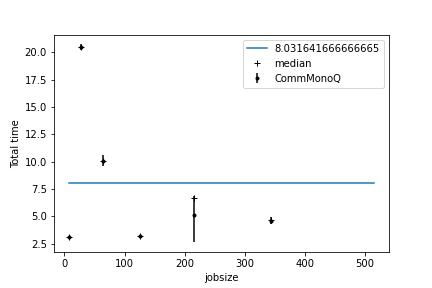
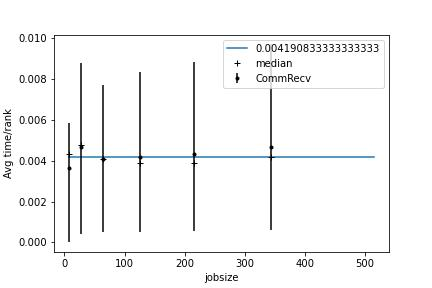
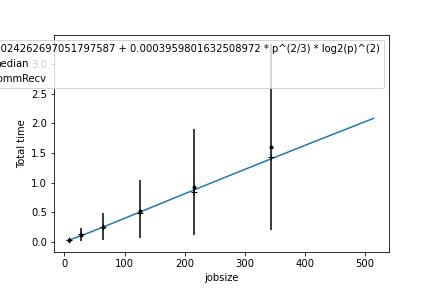
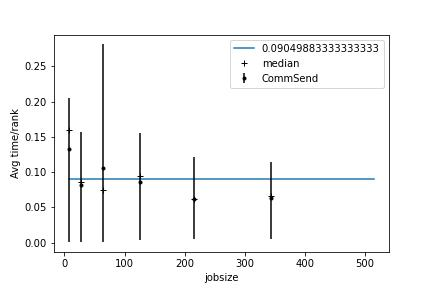
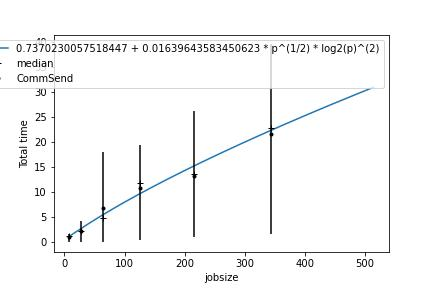
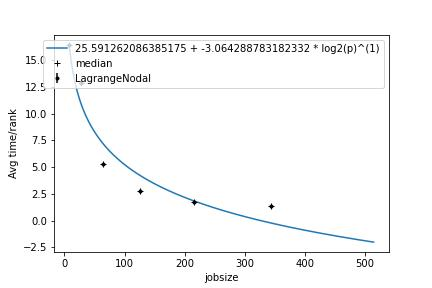
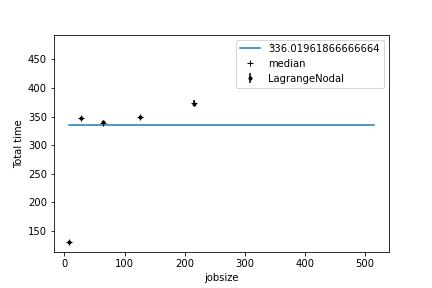
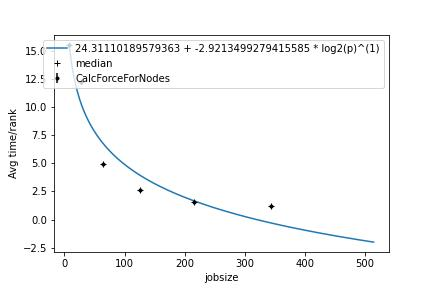
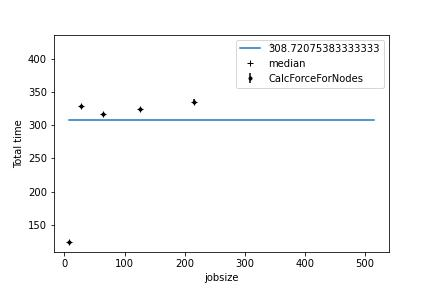
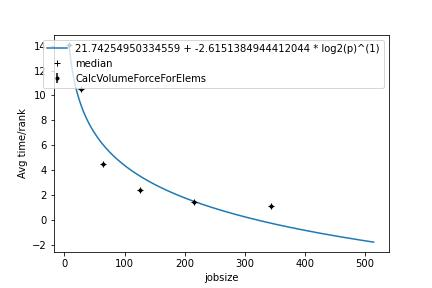
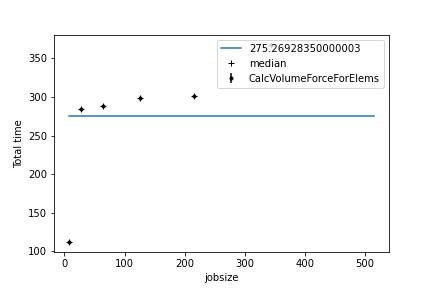
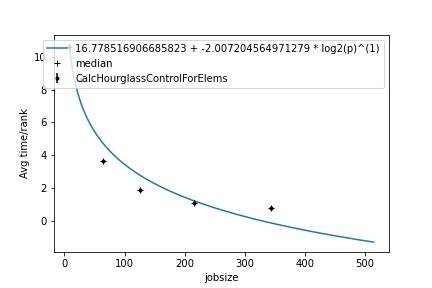
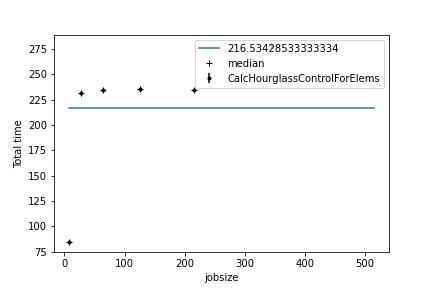
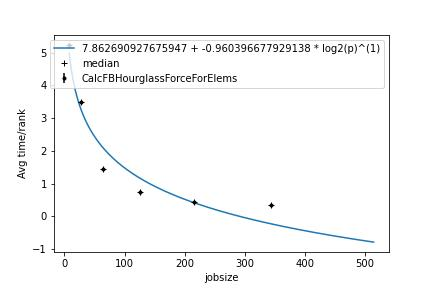
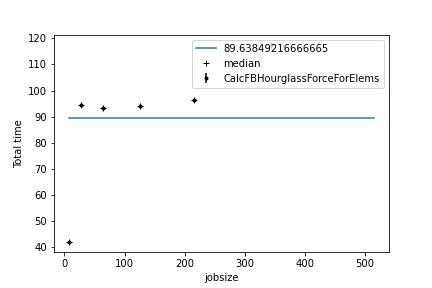
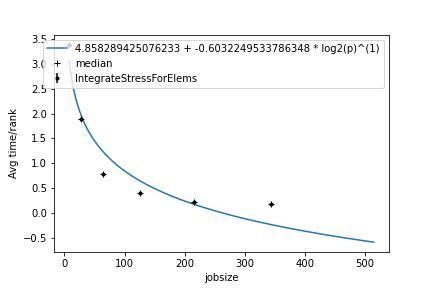
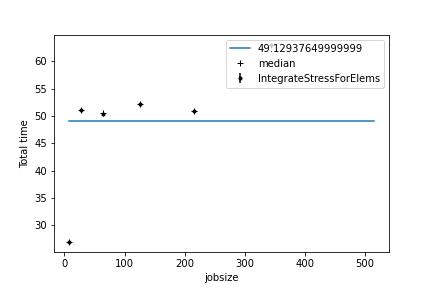
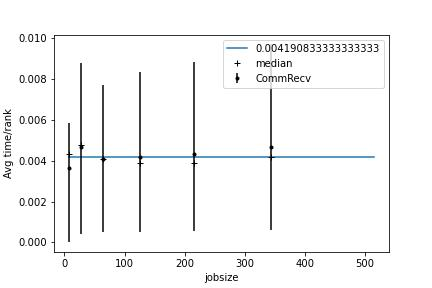
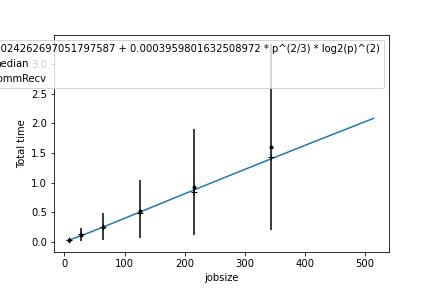
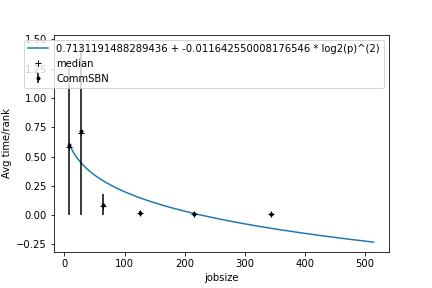
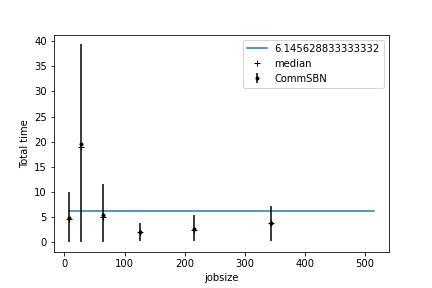
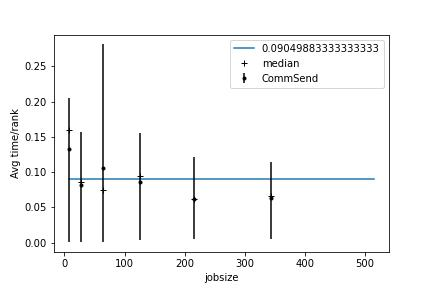
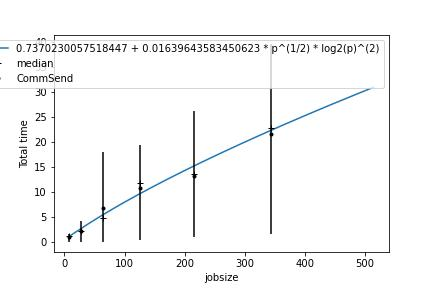
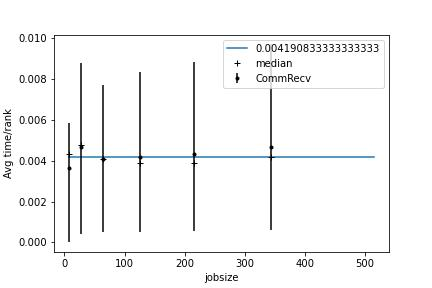
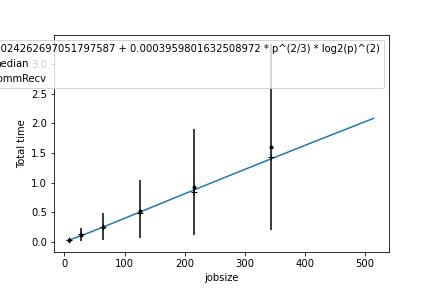
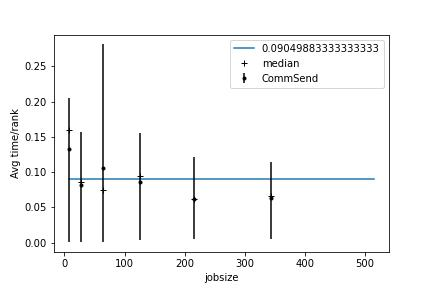
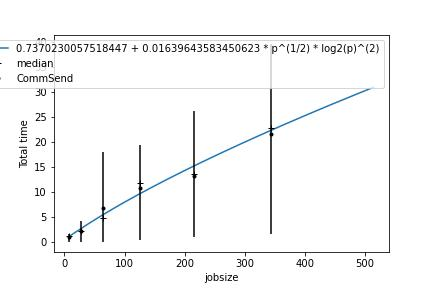
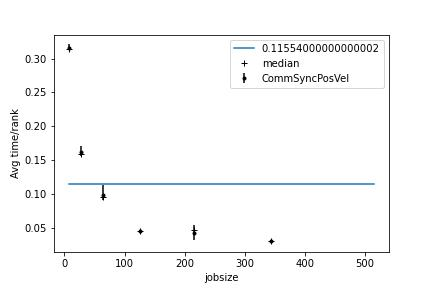
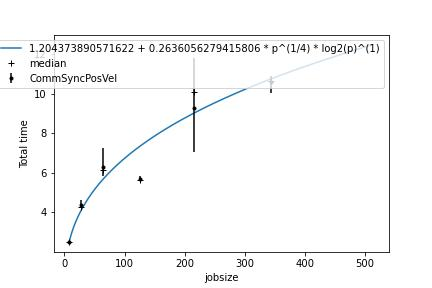
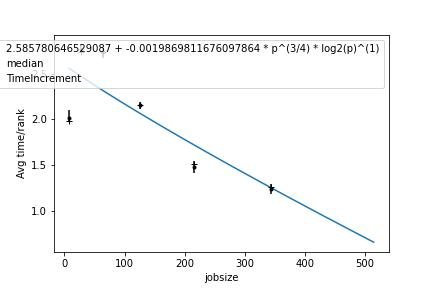
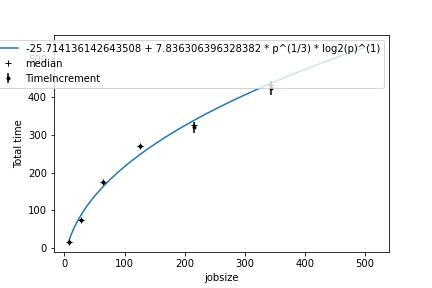

In [16]:
with pd.option_context("display.max_colwidth", 1):
    display(HTML(mdl.to_html()))